In [1]:
from gamspy import Container, Set, Parameter, Variable, Equation, Model, Sum, Sense, Options
import matplotlib.pyplot as plt
from utils import visualize
import sys

Una empresa tiene dos factorías A y B. En ellas se fabrica un producto, a razón de 500 y 400 unidades por día respectivamente. El producto ha de ser distribuido posteriormente a tres centros I, II y III que requieren, respectivamente, 200, 300 y 400 unidades. Los costos de transportar cada unidad de producto desde cada factoría a cada uno de los centros de distribución se indican en la siguiente tabla:


| Factoria   | I       | II      | III     | Fabricacion (Unidades) |
| ---------- | ------- | ------- | ------- | ---------------------- |
| A          | 50      | 60      | 10      | 500                    |
| B          | 25      | 40      | 20      | 400                    |
| Demanda    | 200     | 300     | 400     |                        |

In [2]:
container = Container()

In [3]:
factories = Set(container=container, name='factories', records=['A', 'B'])
clients = Set(container=container, name='clients', records=['I', 'II', 'III'])

factories, clients

(Set(name='factories', domain=['*']), Set(name='clients', domain=['*']))

In [4]:
offer = Parameter(container=container, name='offer', domain=[
                  factories], records=[['A', 500], ['B', 400]])

demand = Parameter(container=container, name='demand', domain=[
                   clients], records=[['I', 200], ['II', 300], ['III', 400]])

cost = Parameter(container=container, name='cost', domain=[factories, clients], records=[
    ['A', 'I', 50], ['A', 'II', 60], ['A', 'III', 10],
    ['B', 'I', 25], ['B', 'II', 40], ['B', 'III', 20],
])

offer, demand, cost

(Parameter(name='offer', domain=[Set(name='factories', domain=['*'])]),
 Parameter(name='demand', domain=[Set(name='clients', domain=['*'])]),
 Parameter(name='cost', domain=[Set(name='factories', domain=['*']), Set(name='clients', domain=['*'])]))

In [5]:
x = Variable(container=container, name='x', domain=[
             factories, clients], type='Positive')

x

Variable(name='x', domain=[Set(name='factories', domain=['*']), Set(name='clients', domain=['*'])], type='positive')

In [7]:
supply_equation = Equation(container=container, name='supply_equation', domain=factories)
demand_equation = Equation(container=container, name='demand_equation', domain=clients)

supply_equation[factories] = Sum(clients, x[factories, clients]) <= offer[factories]
demand_equation[clients] = Sum(factories, x[factories, clients]) >= demand[clients]
objective = Sum((factories, clients), cost[factories, clients] * x[factories, clients])

supply_equation, demand_equation, objective

(Equation(name='supply_equation', type='eq', domain=[Set(name='factories', domain=['*'])]),
 Equation(name='demand_equation', type='eq', domain=[Set(name='clients', domain=['*'])]),
 Sum(domain=[], expression=Expression(left=ImplicitParameter(parent=Parameter(name='cost', domain=[Set(name='factories', domain=['*']), Set(name='clients', domain=['*'])]), name='cost', domain=[Set(name='factories', domain=['*']), Set(name='clients', domain=['*'])], permutation=None), parent_scalar_domains=[]), data=*, right=ImplicitVariable(parent=Variable(name='x', domain=[Set(name='factories', domain=['*']), Set(name='clients', domain=['*'])], type='positive'), name='x', domain=[Set(name='factories', domain=['*']), Set(name='clients', domain=['*'])], permutation=None, parent_scalar_domains=[]))))

In [8]:
transport = Model(container=container, name='transport', equations=container.getEquations(
), problem='LP', sense=Sense.MIN, objective=objective)

In [9]:
transport.solve(output=sys.stdout, options=Options(equation_listing_limit=10, variable_listing_limit=10))

--- Job _9d10e99e-90a1-4d2d-aaab-f0a7a9dfc796.gms Start 04/04/25 10:24:17 49.3.0 7de46a92 WEX-WEI x86 64bit/MS Windows
--- Applying:
    D:\dev\python\gamspy\.venv\Lib\site-packages\gamspy_base\gmsprmNT.txt
--- GAMS Parameters defined
    LP CPLEX
    Input C:\Users\Aquaman\AppData\Local\Temp\tmp0d389m0t\_9d10e99e-90a1-4d2d-aaab-f0a7a9dfc796.gms
    Output C:\Users\Aquaman\AppData\Local\Temp\tmp0d389m0t\_9d10e99e-90a1-4d2d-aaab-f0a7a9dfc796.lst
    ScrDir C:\Users\Aquaman\AppData\Local\Temp\tmp0d389m0t\tmp1soc76gj\
    SysDir D:\dev\python\gamspy\.venv\Lib\site-packages\gamspy_base\
    LogOption 3
    Trace C:\Users\Aquaman\AppData\Local\Temp\tmp0d389m0t\_9d10e99e-90a1-4d2d-aaab-f0a7a9dfc796.txt
    License D:\dev\python\gamspy\.venv\Lib\site-packages\gamspy_base\gamslice.txt
    OptDir C:\Users\Aquaman\AppData\Local\Temp\tmp0d389m0t\
    LimRow 10
    LimCol 10
    TraceOpt 3
    GDX C:\Users\Aquaman\AppData\Local\Temp\tmp0d389m0t\_9d10e99e-90a1-4d2d-aaab-f0a7a9dfc796out.gdx
    SolP

,Solver Status,Model Status,Objective,Num of Equations,Num of Variables,Model Type,Solver,Solver Time
0,Normal,OptimalGlobal,23000,6,7,LP,CPLEX,0


In [11]:
x.records.pivot(index='factories', columns='clients', values='level')

clients,I,II,III
factories,,,
A,0.0,100.0,400.0
B,200.0,200.0,0.0


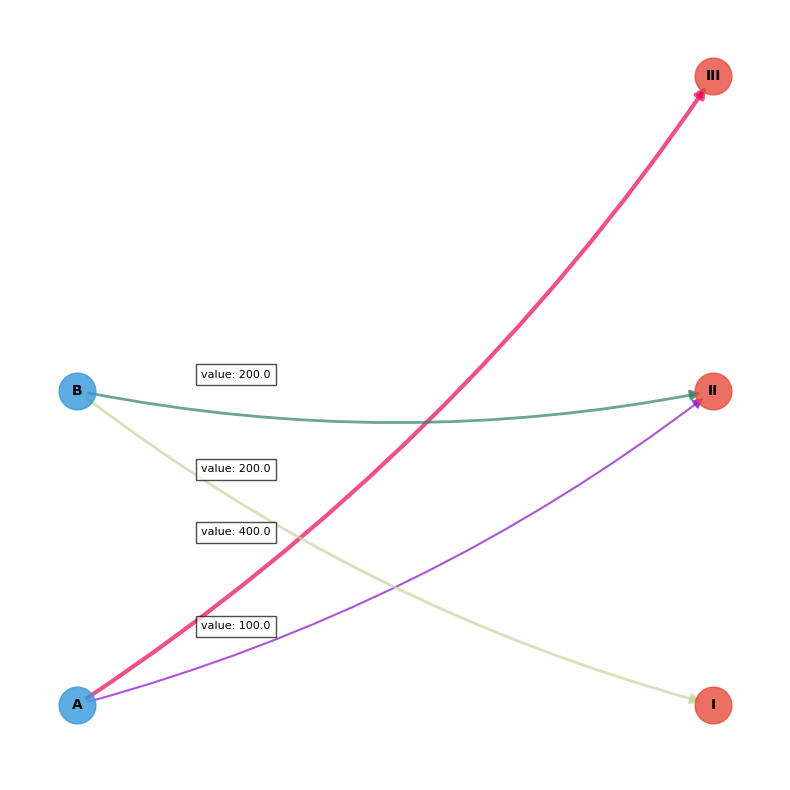

In [ ]:
fig, ax = visualize(data=x.records, index='factories',
                    columns='clients', values='level', figsize=(8, 8))
plt.show()